## 线性回归算法基本介绍

在学习线性回归的知识点之前，我们先了解一下监督学习的概念。监督学习比较正式的定义是，给定一个训练集，学习到一个函数h：

$χ↦y$

h(x)是对对应值y的一个很好的估计,由于历史存在的问题，将这个函数h成为假设(hypothesis)。

如果我们估计的值是个连续的值，我们将我们的学习问题称为回归，如果估计的值是一个离散的值，我们将我们的学习问题成为分类。

线性回归指的是用自变量x的一次函数来估计结果y的值。


$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1}+\theta_{2}x_{2}$

上述中 $\theta_{i}$为参数(也称为权重)，为了进一步简化我们的表示，我们假设 $x_0=1$,因此上式又可以写成：  

$h_{\theta}(x)=\sum_{i=0}^{n}\theta_ix_i=\theta^Tx$

给定一个数据集的情况下，怎样选择参数$\theta$，使得假设能够比较接近y呢？这里，我们引入了成本函数(cost function)，它衡量了假设和y值得接近程度，即最小平方(最小二乘法)成本函数(least square cost function)  

$J(\theta)= \frac{1}{2}\sum_{i=0}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$


##### 最小均方算法(LMS, Least Mean Square)  
我们的目标是选择合适的$\theta$,去最小化成本函数$J(\theta)$。我们从一个猜想的初始$\theta$开始，逐步去更新$\theta$，使得$J(\theta)$更小，最终收敛到一个$\theta$值，使得$J(\theta)$最小。  
  
更加具体一点的是，考虑梯度下降算法(gradient descent)，从一个初始的$\theta$值开始，不断重复地去做如下的更新：  

$\theta_{j} := \theta_{j}-\alpha\frac{\partial}{\partial\theta_{j}}J(\theta)$

上述的更新针对所有的$j=0,1,2...n$，这里$\alpha$是学习率，在这里每一步选择$J(\theta)$的最陡的方向进行$\theta$的更新。  

当只有一个样本的时候，有如下关系成立：

$\frac{\partial J(\theta)}{\partial \theta_{i}}=\frac{\partial}{\partial\theta_{i}}\frac{1}{2}(h_{\theta}(x)-y)^2$

$=2\cdot \frac{1}{2}(h_{\theta}(x)-y)\cdot \frac{\partial}{\partial \theta_{i}}(h_{\theta(x)}-y)$

$=(h_{\theta(x)}-y)\cdot x_{i}$


因此，当只有一个样本的时候，$\theta$的更新规则如下：

$\theta_{j} := \theta_{j}+\alpha(y^{(i)}-h_\theta(x^{(i)})x_j^{(i)}$

这个规则也叫做最小均方更新规则，这个规则看上去很自然也很直观，比如更新的幅度正比于error项$y^{(i)}-h_\theta(x^{(i)}$，当预测的值和y值比较match的时候，误差项比较小，$\theta$更新的幅度也小，当预测的值和y值相差比较大的时候，说明模型参数还没有能很好地进行目标预测，$\theta$更新的幅度也大。

当有多个样本的时候，有两种方法可以对上述规则进行扩展，第一种方法称为批量梯度下降法(batch gradient decent),具体更新规则如下：  
迭代如下公式直至收敛

$\theta_{j} := \theta_{j}+\alpha \sum_{i=1}^{m}(y^{(i)}-h_\theta(x^{(i)})x_j^{(i)}\  (for \  every \ j)$

需要注意的是，梯度下降法容易找到局部最小点，但是在这里提出的线性回归的优化问题只有一个全局的，而没有局部的最优值。因此在这里梯度下降法总是收敛到全局的最小值。在这里`$J$`是一个凸的二次函数，可以用梯度下降法去优化凸二次函数。  
第二种方法称为随机梯度下降法(stochastic gradient decent),具体更新规则如下：  
迭代如下公式：  

$
for\ i=1\ to\ m: \{ 
\theta_{j} := \theta_{j}+\alpha (y^{(i)}-h_\theta(x^{(i)})x_j^{(i)}\  (for \  every \ j)\}
$

在随机梯度下降的过程中，我们每次碰到一个样本，$\theta$更新的时候只针对当前的样本去算梯度。批量梯度下降是扫描整个数据集然后更新参数，这是一个非常耗费的运算，而随机梯度更新一次参数的运算只针对单个样本，计算很快，所以能更快的接近最值点。需要注意的是，随机梯度下降不能达到最值点，在最后会在最值点震荡，但在很多问题中这样的优化策略已经足够实用。因此在实际场景中，随机梯度下降法比批量梯度下降法更实用。


## 线性回归的概率解释：

当面临线性回归的时候，为什么将最小二乘作为成本函数是合适的呢？在本部分，将给出一个概率解释，就理解为什么最小二乘作为线性回归的成本函数是很自然的一个算法。假设我们的目标变量和输入变量通过如下的等式关联起来:
  
  $y^{(i)}=\theta ^T x^{(i)}+\epsilon ^{(i)}$

  其中$\epsilon ^{(i)}$为误差项，可以将误差归结为是由于没有纳入到建模中的一些变量（特征），或者仅仅是由于噪声引起的。我们进一步假设$\epsilon ^{(i)}$服从IID(independently and identically distributed)的均值为0，方差为$\sigma$的高斯分布，写作 $\epsilon ^{(i)}\sim N(0,\sigma^2)$ 。$\epsilon ^{(i)}$ 的概率密度为：
  
$p(\epsilon^{(i)})=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(\epsilon^{(i)})^2}{2\sigma^2})$

因此下面的等式也会成立：
  
$p(y^{(i)}|x^{(i)};\theta)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$

  给定一个数据集，它的似然函数(样本的联合分布)可以表示为：
  
$L(\theta)=L(\theta;X,\vec y)=p(\vec y |X;\theta)$

   由于我们假设$\epsilon ^{(i)}$服从IID的高斯分布，因此上述的公式也可以写为:
   
$L(\theta)=\prod_{i=1}^{m}p(y^{(i)}|x^{(i)};\theta)=\prod_{i=1}^{m}\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$
  现在我们考虑怎么选择合适的$\theta$来最大化$L(\theta)$。这里面我们采用了一个等价的方法，通过最大化$logL(\theta)$

$l(\theta)=logL(\theta)$

$= log\prod_{i=1}^{m}\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$

$= \sum_{i=1}^{m}log\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$

$= mlog\frac{1}{\sqrt{2\pi}\sigma}-\frac{1}{\sigma^2}\frac{1}{2}\sum_{i=1}^{m}(y^{(i)}-\theta^Tx^{(i)})^2$

根据上式，最大化$l(\theta)$也就是最小化$\frac{1}{2}\sum_{i=1}^{m}(y^{(i)}-\theta^Tx^{(i)})^2$


In [10]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import time
import copy

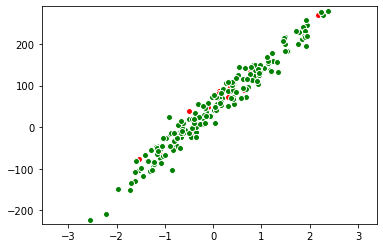

Coef=96.19363785472291


In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

'''
make dummy regression data
sklearn.datasets.make_regression 

params:
    @random_state, int or None
    随机数状态，类似random seed，在多次的不同调用中可以传入相同的数来生成可重复的输出
    
    @n_targets : int, optional (default=1)
    回归的目标数目，也就是回归的目标结果的维度，默认是一个标量数字(1维)

    @n_features : int, optional (default=100) 特征数
    
    @noise : float, optional (default=0.0),
    生成的数据并不是完全理想的拟合回归模型的数据，而是带有高斯噪声的，noise变量定义了高斯噪声的标准差
    The standard deviation of the gaussian noise applied to the output.
'''

X, Y, Coef = datasets.make_regression(n_samples=200, n_features=1, noise=20, random_state=0, bias=50,coef=True)


'''
按照一定的比例随机切分训练集和测试集
sklearn.model_selection.train_test_split
params
    @test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量
'''

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1, random_state=0)
X0_train = np.ones([X_train.shape[0],1],dtype=X_train.dtype)
X0_test = np.ones([X_test.shape[0],1], dtype=X_test.dtype)
X_train_original = copy.deepcopy(X_train)
X_train = np.concatenate((X0_train,X_train), axis=1)
X_test = np.concatenate((X0_test, X_test), axis=1)


# show data
plt.scatter(X_test[:,1], Y_test, c='red', edgecolors='white')
plt.scatter(X_train[:,1], Y_train, c='green', edgecolors='white')
plt.ylim((Y.min()-10, Y.max()+10))
plt.xlim((X.min()-1, X.max()+1))
plt.show()
print('Coef={}'.format(Coef))


[1/3, Stpes:1, loss: 2359.3714563698077, Weight: 0.8531287349451685, Bias:0.403500763624851]
[1/3, Stpes:2, loss: 1499.1987967040443, Weight: 0.9225566470673486, Bias:1.443944761819671]
[1/3, Stpes:3, loss: 4029.743424692695, Weight: 2.4096522979522983, Bias:1.0662206915061812]
[1/3, Stpes:4, loss: 2669.1695842959766, Weight: 2.6234723416151295, Bias:2.47706811908912]
[1/3, Stpes:5, loss: 3040.437090573432, Weight: 3.3898225940361746, Bias:3.989936009450438]
[1/3, Stpes:6, loss: 3304.5197116897575, Weight: 5.657106071216698, Bias:2.434933535023357]
[1/3, Stpes:7, loss: 2005.6735548295749, Weight: 6.126283250759857, Bias:3.0398132170707983]
[1/3, Stpes:8, loss: 4489.631973721973, Weight: 7.651964337652807, Bias:4.7681964730398745]
[1/3, Stpes:9, loss: 5938.871249882515, Weight: 9.641594881823472, Bias:5.7466999380587485]
[1/3, Stpes:10, loss: 732.7514213195013, Weight: 9.865198269623624, Bias:5.968107903701959]
[1/3, Stpes:11, loss: 6596.5698175689395, Weight: 12.683016757187772, Bias:5

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/code/machine-learning/sgd_linear_regression.gif'

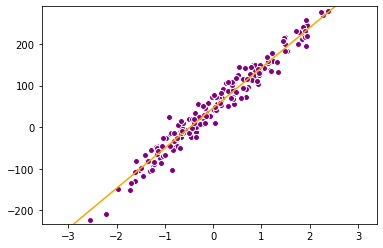

In [12]:
import matplotlib.animation as animation
import copy
#import pdb
#pdb.set_trace()

#learnable parameter theta
THETA = np.zeros([2,1], dtype=np.float32)
# learning rate
lr = 0.02
epoch = 3

#plt.ion()
thetas = []
ln = None
'''
linspace,Return evenly spaced numbers over a specified interval.
在闭区间[2, 3]生成5个间隔相同的数字
print(np.linspace(2.0, 3.0, num=5))
[2.   2.25 2.5  2.75 3.  ]
'''

p_x = np.linspace(X.min()-1, X.max()+1, 50)
fig = plt.figure()
plt.scatter(X_train[:,1], Y_train, c='purple', marker='o', edgecolors='white')
ln, = plt.plot(p_x, THETA[1,0]*p_x+THETA[0,0], c='orange')

def init():
    plt.ylim((Y.min()-10, Y.max()+10))
    plt.xlim((X.min()-1, X.max()+1))    
    return ln,

'''
numpy中的乘法
　元素相乘:multply()
　矩阵相乘:dot()、matmul()、’@’
　’*': 是特别的。在数组操作中，作为元素相乘；在矩阵操作中作为矩阵相乘。
batch_X
[[ 1.          1.        ]
    [ 0.37642553 -1.16514984]]

batch-Y
[[ 85.83865632]
    [-45.48857996]]
theta
[[0.40350076]
    [0.85312873]]
loss
[[2359.37145637 2359.37145637]]

'''
def h(theta, X):
    h_x = np.matmul(theta.T,X)
    #import pdb
    #pdb.set_trace()
    return h_x

def loss_function(theta, X, Y):
    cost = 1/2*np.matmul((h(theta,X)-Y.T),(h(X,theta)-Y.T).T)
    return cost/(X.shape[0])

# child block matrix trick using mulitiply functions
def gradient(theta,X, Y):
    gradient = np.multiply(X.T,(h(theta,X)-Y.T).T)
    return gradient.mean(axis=0).T

def update_parameters(theta, gradient, lr):
    theta = theta-lr*gradient
    return theta

def update(frame):
    #xdata.append(frame)
    #ydata.append(np.shin(frame))
    Y = frame[1,0]*p_x+frame[0,0]
    ln.set_data(p_x, Y)
    return ln,


for ep in range(epoch):
    for index in range(X_train.shape[0]//2):
        batch_X = X_train[index*2:(index+1)*2,:].T # 2*2 matrix
        batch_Y = Y_train[index*2:(index+1)*2].reshape([2,1])# 2*1 matrix
        h_X = h(THETA, batch_X) # 1*2 matrix
        loss = loss_function(THETA, batch_X, batch_Y)
        g = gradient(THETA, batch_X, batch_Y)
        g = g.reshape([2,1])
        THETA = update_parameters(THETA, g, lr)
        print("[{0}/{1}, Stpes:{2}, loss: {3}, Weight: {4}, Bias:{5}]".format( \
                   ep+1, epoch, index+1, loss[0][0],THETA[1,0],THETA[0,0]))
        theta = copy.deepcopy(THETA)
        thetas.append(theta)
        #import IPython
        #IPython.embed(colors="Linux")
        #plt.cla()
        #plt.scatter(X_train[:,1], Y_train, c='purple', marker='o', edgecolors='white')
        #plt.plot(p_x, THETA[1,0]*p_x+THETA[0,0], c='orange')
        #plt.pause(0.01)
        # ims.append(im)
#plt.ioff()
anim = animation.FuncAnimation(fig, update,frames=thetas,interval=25,init_func=init, blit=True)
# plt.show()
#anim.save("/kaggle/working/linear_regression_demo.gif",writer='pillow')
# ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
anim.save("/mnt/code/machine-learning/sgd_linear_regression.gif",writer='pillow')

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./

import torch
import torch.nn as nn
import time

train_log_filepath = "./train_log.txt"
train_log_txt_formatter = "{time_str} [Epoch] {epoch:03d} [Loss] {loss_str}\n"

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(1,1)
model = model.double()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
num_epoches = 5
for epoche in range(num_epoches):
    for index in range(X_train_original.shape[0]//2):
        batch_X = X_train_original[index*2:(index+1)*2,:]
        batch_Y = Y_train[index*2:(index+1)*2].reshape([2,1])
        inputs = torch.from_numpy(batch_X)
        targets = torch.from_numpy(batch_Y)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs,targets)
        loss.backward()
        optimizer.step()
    #if (epoch+1) % 5 == 0:
    print ('Epoch [%d/%d], Loss: %.4f' 
           %(epoch+1, num_epoches, loss.item()))
    to_write = train_log_txt_formatter.format(time_str=time.strftime("%Y_%m_%d_%H:%M:%S"),
                                          epoch = epoch,
                                          loss_str=loss.item())
    with open(train_log_filepath, "a") as f:
        f.write(to_write)
predicted = model(torch.from_numpy(X_train_original)).data.numpy()
plt.plot(X_train_original, Y_train, 'ro', label='Original data')
plt.plot(X_train_original, predicted, label='Fitted line')
plt.show()
